<a href="https://colab.research.google.com/github/wenyi22/python-deep-learning/blob/main/%E9%80%A2%E7%94%B2%E5%A4%A7%E5%AD%B8%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E7%AC%AC%E4%BA%94%E5%A0%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#手寫辨識

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical   #分類設定
from tensorflow.keras.models import Sequential     #神經網絡物件
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.datasets import mnist     #手寫數字資料集
from tensorflow.keras.optimizers import SGD     #梯形修正


In [ ]:
#載入手寫資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train.shape   #圖片資訊

(60000, 28, 28)

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

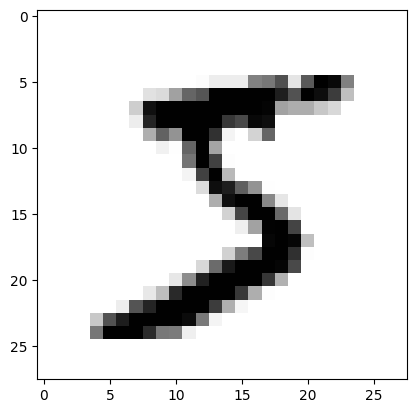

In [ ]:
plt.imshow(x_train[0],cmap='binary')    #cmap='binary' 以黑白方式呈現

In [ ]:
y_train[0]

5

In [ ]:
t1 = x_train.reshape(60000,784)   #784 => 28*28  將每一張圖片的像素合併為一維陣列
print(len(t1[0]))

784


In [ ]:
t1[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
x_train = x_train.reshape(60000,-1)   # 將訓練資料變為1 維陣列
print(len(x_train[0]))
print(x_train[0])



784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   

In [ ]:
x_test = x_test.reshape(10000,-1)

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
# 色階 0~255
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
y_train = to_categorical(y_train,10)   # 將答案0~9 有10 轉換為一維串列

In [ ]:
y_train[0]  # 答案是 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_train[1]  # 答案是 0

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_test = to_categorical(y_test,10)

In [ ]:
# 建模
model = Sequential()
# 神經元越多效果越好，但執行效率差

In [ ]:
model.add(Dense(20,activation='relu',input_dim=784))

In [ ]:
#加入第一層隱藏層
model.add(Dense(40,activation='relu'))    #越後面的層數，神經元會越大

In [ ]:
#加入第二層隱藏層
model.add(Dense(80,activation='relu'))

In [ ]:
#輸出層
model.add(Dense(10,activation='softmax'))   #多元分類， 10 => 有 10 個答案

In [ ]:
#摘要
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 40)                840       
                                                                 
 dense_2 (Dense)             (None, 80)                3280      
                                                                 
 dense_3 (Dense)             (None, 10)                810       
                                                                 
Total params: 20,630
Trainable params: 20,630
Non-trainable params: 0
_________________________________________________________________


20 * 784 + 20 = 15700

20*40+40 =>840

40*80+80 =>3280

80*10+10 =>810

In [ ]:
# 編譯
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

#loss 損失函式 mse 平均方差

#metrics=['accuracy'] 只顯示正確率

#optimizer 優化器 SGD梯形修正  Momentum Adagrad RMSProp adam Range

In [ ]:
#訓練
model.fit(x_train,y_train,validation_batch_size=0.2,batch_size=100,epochs=30)

# validation_batch_size 驗證率 ， 0.2 表示會放入20% 的資料進行驗證，放入的資料越大，所用的記憶體會越大
# model.fit(x_train,y_train,batch_size=600,epochs=30)
# model.fit(x_train,y_trsin,batchz_size=100,epochs=30)

Epoch 1/30
600/600 [==============================] - 11s 3ms/step - loss: 0.0200 - accuracy: 0.8649
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0095 - accuracy: 0.9397
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0080 - accuracy: 0.9492
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0070 - accuracy: 0.9555
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0063 - accuracy: 0.9600
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0059 - accuracy: 0.9631
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0055 - accuracy: 0.9650
Epoch 8/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0051 - accuracy: 0.9684
Epoch 9/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9699
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.971

In [ ]:
#預測
predict = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predict[0]

array([1.5814589e-09, 3.8383909e-09, 1.3656355e-06, 9.4877265e-08,
       6.3412892e-10, 7.1414853e-11, 9.6167073e-14, 9.9999166e-01,
       8.6058812e-08, 6.8254431e-06], dtype=float32)

In [ ]:
np.argmax(predict[0]) #測試集的第一個答案

7

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
# 安裝 GUI
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.2/294.2 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
 

In [ ]:
import gradio as gr

In [ ]:
def mnist(image):
  image = image.reshape(1,784)
  print(image)
  print('-'*20)
  print(model.predict(image).tolist())
  prediction = model.predict(image).tolist()[0]
  return {str(i):prediction[i] for i in range(10)}

grobj = gr.Interface(fn=mnist,inputs='sketchpad',outputs=gr.outputs.Label(num_top_classes=3,label="預測手寫數字"),title='手寫辨識')
grobj.launch(share=True)

# sketchpad 使用電子白板方式
# num_top_classes 顯示機率最高的前三筆

<ipython-input-35-1353f95b005b>:9: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  grobj = gr.Interface(fn=mnist,inputs='sketchpad',outputs=gr.outputs.Label(num_top_classes=3,label="預測手寫數字"),title='手寫辨識')
<ipython-input-35-1353f95b005b>:9: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  grobj = gr.Interface(fn=mnist,inputs='sketchpad',outputs=gr.outputs.Label(num_top_classes=3,label="預測手寫數字"),title='手寫辨識')


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://01ae66fc0d08ebd3f2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


#CNN 判斷 10 個種類照片

In [ ]:
 from keras.datasets import cifar10
 from keras.utils import np_utils
 import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
len(x_train)


50000

In [ ]:
len(x_test)

10000

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

10種不同的彩色圖片

0飛機 1汽車 2鳥 3貓 4鹿 5狗 6青蛙 7馬 8船 9卡車

In [ ]:
x_train.shape #32*32 3(RGB)  表示為彩色圖片

(50000, 32, 32, 3)

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

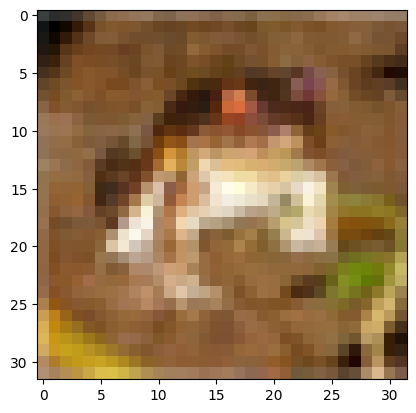

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='binary')

In [ ]:
y_train[0]

array([6], dtype=uint8)

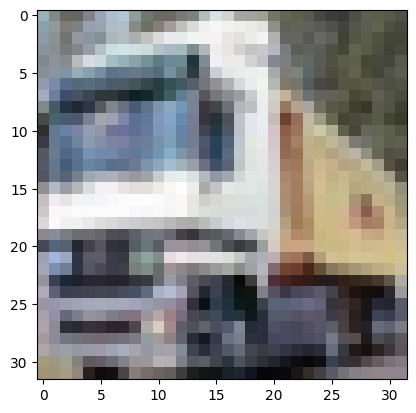

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1],cmap='binary')

In [ ]:
y_train[1]

array([9], dtype=uint8)

In [ ]:
x_train_normal = x_train.astype('float32') / 255
x_train_normal[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [ ]:
x_test_normal = x_test.astype('float32') / 255

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
#建模
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import Activation,ZeroPadding2D

#Conv2D 2維卷積層 MaxPooling2D 2維池化層

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(32,32,3),activation='relu'))

卷積層 (Conv1D 一維, Conv2D 二維, Conv3D 三維)

filters 針對圖片每一個階段的書出面或深度做輸出，輸出的圖稱為:特徵圖，
一般都是 4 的倍數

kernel_size 卷積核大小，一般都是用正方形，邊常維奇數:3x3

padding:補零方式，若卷積滑動時，若超過邊界，是否要放棄這個output點(valid)、一律補零(same)、還是不計算超過越邊界的input值(causal)

input_shape:輸入圖片的寬、高、通道


In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))
#pool_size 池化視窗大小\



In [ ]:
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Dropout(0.2))
# Droput(rate) rate 介於0~1之間的浮點數，表示要丟棄的比例
# 防止資料過擬合(overfitting)

In [ ]:
model.add(Flatten()) #扁平

In [ ]:
model.add(Dense(1024,activation='relu'))    #32*32

In [ ]:
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
#摘要
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)             

In [ ]:
train_history = model.fit(x_train_normal,y_train,batch_size=128,epochs=30)

Epoch 1/30
391/391 [==============================] - 10s 8ms/step - loss: 1.4669 - accuracy: 0.4751
Epoch 2/30
391/391 [==============================] - 3s 8ms/step - loss: 1.0730 - accuracy: 0.6245
Epoch 3/30
391/391 [==============================] - 3s 8ms/step - loss: 0.9217 - accuracy: 0.6761
Epoch 4/30
391/391 [==============================] - 4s 9ms/step - loss: 0.8043 - accuracy: 0.7186
Epoch 5/30
391/391 [==============================] - 3s 8ms/step - loss: 0.6977 - accuracy: 0.7567
Epoch 6/30
391/391 [==============================] - 3s 8ms/step - loss: 0.5957 - accuracy: 0.7936
Epoch 7/30
391/391 [==============================] - 3s 8ms/step - loss: 0.5026 - accuracy: 0.8248
Epoch 8/30
391/391 [==============================] - 3s 8ms/step - loss: 0.4062 - accuracy: 0.8598
Epoch 9/30
391/391 [==============================] - 3s 8ms/step - loss: 0.3272 - accuracy: 0.8871
Epoch 10/30
391/391 [==============================] - 3s 8ms/step - loss: 0.2530 - accuracy: 0.913

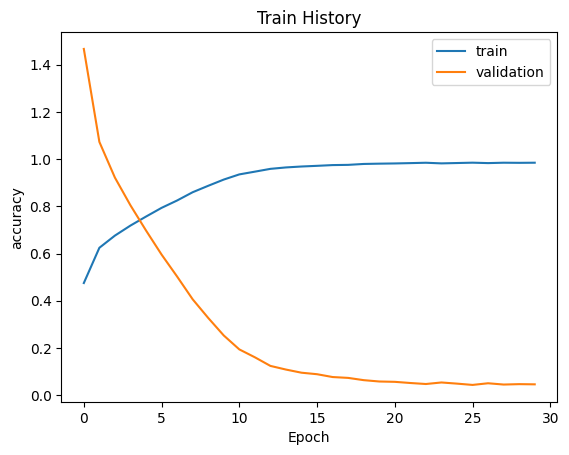

In [ ]:
#用圖表來顯示訓練過程
def showHistory(train_history,train,validation):
  plt.plot(train_history.history[train])  #訓練過程紀錄，以什麼為依據(train => accuracy)帶入時會帶: accuracy
  plt.plot(train_history.history[validation]) #validation =>loss
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train','validation'],loc=0)
  plt.show()
showHistory(train_history,'accuracy','loss')

In [ ]:
#預測
predict = model.predict(x_test_normal)

313/313 [==============================] - 1s 3ms/step


In [ ]:
import numpy as np
print(np.argmax(predict[1]))

8


In [ ]:
#製作標籤
anslabel = {0:'airplane',1:'car',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'boart',9:'trunk'}

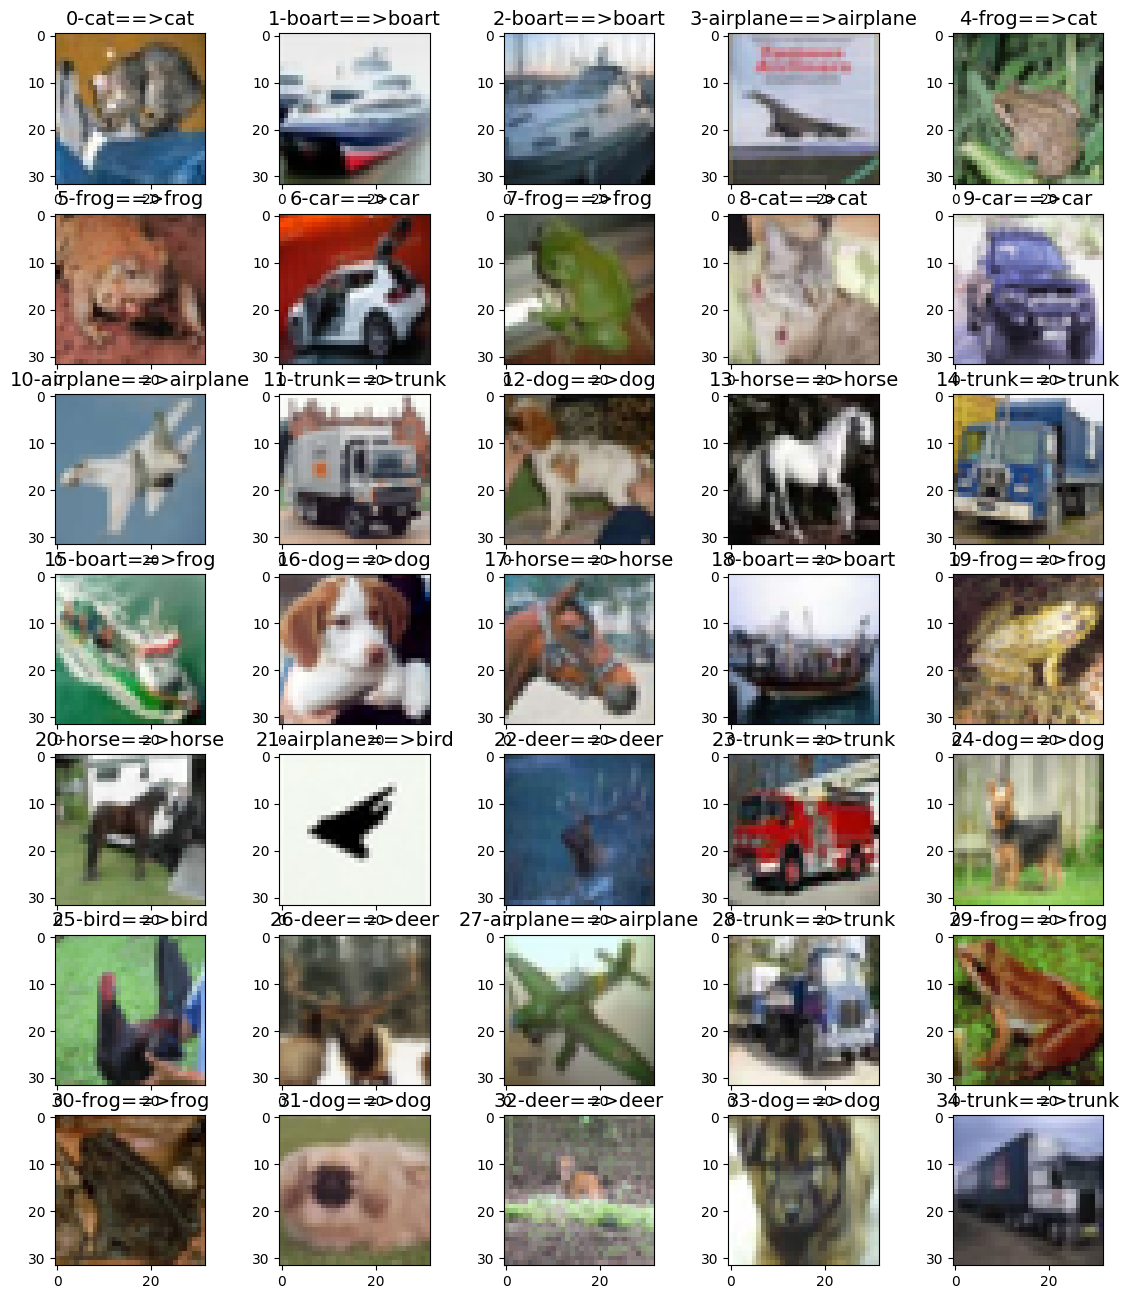

In [ ]:
def plot_predict(images,labels,predict,idx,num=35):
  fig = plt.gcf()
  fig.set_size_inches(14,16)
  for i in range(num):
    ix = plt.subplot(7,5,i+1)
    ix.imshow(images[idx],cmap='binary')\\\\\\\\\\
    lab = np.argmax(labels[i])
    title = str(i) + '-' + anslabel[lab]
    ans = np.argmax(predict[i])
    title += '==>' + anslabel[ans]
    ix.set_title(title,fontsize=14)
    idx+=1
  plt.show()

plot_predict(x_test,y_test,predict,0)

In [ ]:
#儲存模型

model.save('tenPhoto.h5')

#h5格式 ，HDF5格式 (層級資料格式):主要是設計來儲存組織大量資料的檔案格式

In [ ]:
#載入以訓練好的模組
import tensorflow
md = tensorflow.keras.models.load_model('/content/tenPhoto.h5')

In [ ]:
pred = md.predict(x_test_normal)

313/313 [==============================] - 1s 3ms/step


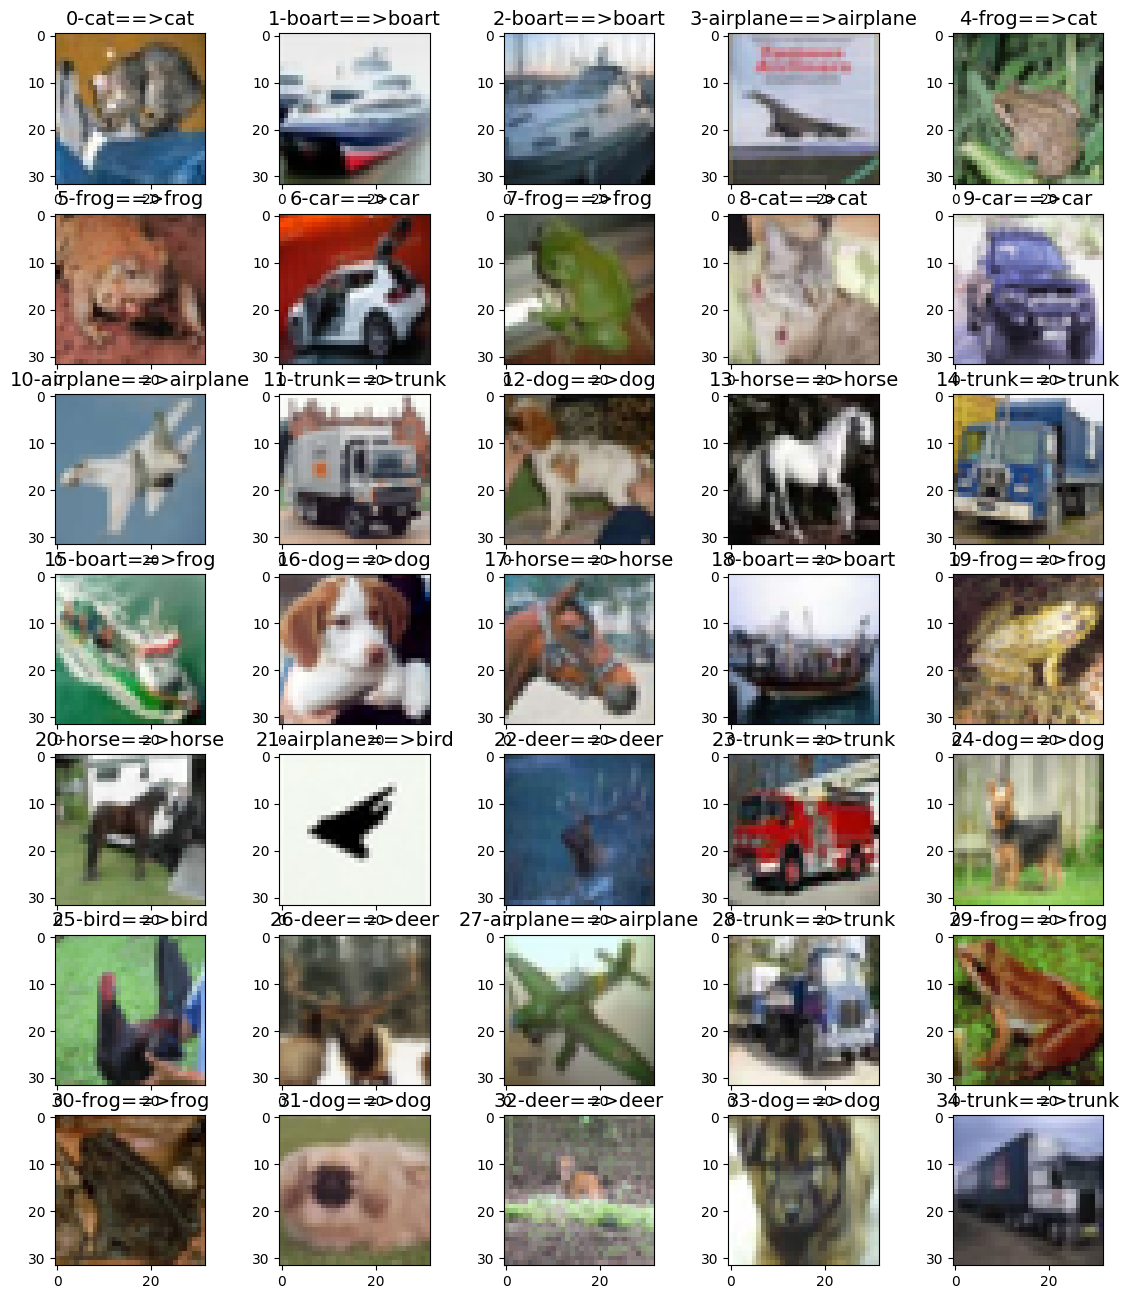

In [ ]:
plot_predict(x_test,y_test,pred,0)